### Add primary imports

In [27]:
import numpy as np
from matplotlib import pyplot as plt 
from numpy import random
from sklearn.model_selection import train_test_split

### Generate random data

In [28]:
n=100
xdata_mean_A , xdata_sigma_A = 0 , 0.1 
ydata_mean_A , ydata_sigma_A = 0 , 0.4
xdata_mean_B , xdata_sigma_B = 1 , 0.2
ydata_mean_B , ydata_sigma_B = 1 , 0.2

# generate random data
Xdata_A = np.random.normal(xdata_mean_A , xdata_sigma_A , n) 
Ydata_A = np.random.normal(ydata_mean_A , xdata_sigma_A , n) 

Xdata_B = np.random.normal(xdata_mean_B , xdata_sigma_B , n)
Ydata_B = np.random.normal(ydata_mean_B , ydata_sigma_B , n)

## Insertion data into matrix
# classA_matrix
Xdata_A_matrix = np.matrix([Xdata_A])
Ydata_A_matrix = np.matrix([Ydata_A])
ClassA_matrix = np.concatenate((Xdata_A_matrix, Ydata_A_matrix))
LabelA = np.ones(n)
LabelA = np.matrix([LabelA])
ClassA_matrix = np.concatenate((ClassA_matrix ,LabelA))
ClassA_matrix = ClassA_matrix.transpose()

# classB_matrix
Xdata_B_matrix = np.matrix([Xdata_B])
Ydata_B_matrix = np.matrix([Ydata_B])
ClassB_matrix = np.concatenate((Xdata_B_matrix, Ydata_B_matrix))
LabelB = np.zeros(n)
LabelB = np.matrix([LabelB])
ClassB_matrix = np.concatenate((ClassB_matrix ,LabelB))
ClassB_matrix = ClassB_matrix.transpose()

## Combining two matrices
data = np.concatenate((ClassB_matrix, ClassA_matrix))
# mix the matrix
np.random.shuffle(data)
print(data[:10])


[[-0.12829737 -0.13364933  1.        ]
 [-0.08105259 -0.16568359  1.        ]
 [ 0.03714673  0.01847927  1.        ]
 [-0.00611378  0.10550153  1.        ]
 [ 0.89620161  1.10979083  0.        ]
 [ 0.20703751 -0.07916921  1.        ]
 [ 1.15291276  0.86851357  0.        ]
 [-0.06285069  0.15700366  1.        ]
 [ 1.11622665  1.11819856  0.        ]
 [ 0.61563377  0.83438523  0.        ]]


### Scatter plot

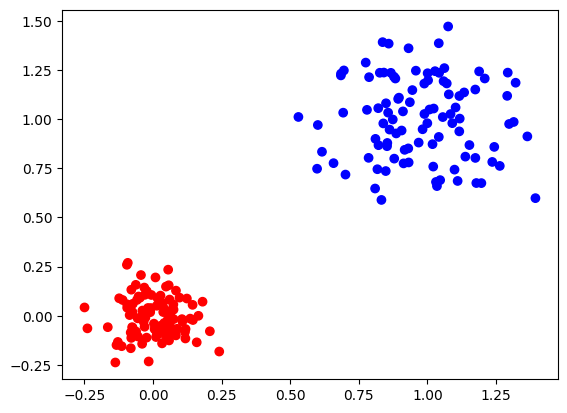

In [29]:
x = np.ravel(data[:, 0])
y = np.ravel(data[:, 1])
colors = np.ravel(data[:, 2])

plt.scatter(x, y, c=colors, cmap='bwr')

### train test split

In [30]:
feature_data = np.delete(data, 2, 1)
label_data = np.asarray(data[:,2])

feature_data_train, feature_data_test, label_data_train, label_data_test = train_test_split( feature_data, label_data, test_size=0.2, random_state=4)
print ('Train set:', feature_data_train.shape,  label_data_train.shape)
print ('Test set:', feature_data_test.shape,  label_data_test.shape)

Train set: (160, 2) (160, 1)
Test set: (40, 2) (40, 1)


### Modeling

In [31]:
class Adaline:
    def __init__(self, lr, threshold):
        self.lr = lr
        self.threshold = threshold  
        self.w = np.zeros(feature_data.shape[1]) + 0.01
        self.bias = 0.1

    def fit(self, feature_data, label_data):
        E = 0 
        for i in range (0,50):
            for i in range(feature_data.shape[0]):
                net=0
                # Generate net
                for j in range (feature_data.ndim):
                    net += (self.w[j]*feature_data[i,j])
                net += self.bias
                # update w1 w2 bias
                for q in range (feature_data.shape[1]):
                    self.w[q] = self.w[q] + self.lr*(label_data[i]-net)*feature_data[i,q]
                self.bias = self.bias + self.lr*(label_data[i]-net)
                # Generate E
                E += 0.5*((label_data[i] - net)**2)     
            if (E < self.threshold): break
            E = 0
            
    def prediction(self, test_data):        
        net = 0
        result = np.zeros(test_data.shape[0])
        # calculation net
        for j in range(test_data.shape[0]):
            for i in range(test_data.ndim):
                net += (self.w[i] * test_data[j,i])
            net += self.bias   
            result[j] = net
            net = 0    
        # Determine the class    
        for i, value in enumerate(result):
            if value >= 0.5: result[i] = 1             # (1+0)/2 = 0.5
            else:result[i] = 0
                                
        return result

In [32]:
adaline = Adaline(lr=0.001, threshold=3)
adaline.fit(feature_data_train, label_data_train)


y_hat = adaline.prediction(feature_data_test)
y_hat

array([1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0.])